In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import re
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [2]:
path = "lab3-data.csv"
data = pd.read_csv(path,encoding = "utf-8",low_memory=False)

## 总体概况性质

In [3]:
data.head()
#显示数据集头部的基本情况

,Unnamed: 0,index,CNTRYID,CNT,NatCen,STRATUM,SUBNATIO,OECD,ADMINMODE,LANGTEST_COG,...,EMOSUPP,PQSCHOOL,PASCHPOL,PRESUPP,JOYREADP,ATTIMMP,INTCULTP,GCAWAREP,BODYIMA,SOCONPA
0,0,11956,152.0,CHL,15200,CHL0206,1520000,1.0,2.0,156.0,...,0.739,0.7457,1.6215,-0.5678,-1.5853,-0.9700,-0.7128,-0.4661,NaN,NaN
1,1,11958,152.0,CHL,15200,CHL0414,1520000,1.0,2.0,156.0,...,0.739,2.0484,1.3268,-0.2262,0.0327,-0.4189,-0.0831,0.2619,NaN,NaN
2,2,11960,152.0,CHL,15200,CHL0308,1520000,1.0,2.0,156.0,...,0.739,-0.7951,-0.6368,0.6406,0.8279,-2.1628,0.6497,-0.6305,NaN,NaN
3,3,11961,152.0,CHL,15200,CHL0414,1520000,1.0,2.0,156.0,...,0.739,-1.4552,-1.1177,-1.1910,1.3690,-1.5354,-0.3192,-0.4310,NaN,NaN
4,4,11965,152.0,CHL,15200,CHL0308,1520000,1.0,2.0,156.0,...,0.739,0.3731,0.5620,0.5225,-0.4457,-0.4189,0.7827,-1.7909,NaN,NaN


In [4]:
data.describe()
#数据的基本性质

,Unnamed: 0,index,CNTRYID,NatCen,SUBNATIO,OECD,ADMINMODE,LANGTEST_COG,LANGTEST_PAQ,BOOKID,...,EMOSUPP,PQSCHOOL,PASCHPOL,PRESUPP,JOYREADP,ATTIMMP,INTCULTP,GCAWAREP,BODYIMA,SOCONPA
count,42176.000000,42176.000000,42176.000000,42176.000000,4.217600e+04,42176.000000,42176.0,42176.000000,15612.000000,42176.000000,...,15375.000000,15495.000000,15457.000000,15522.000000,15290.000000,15047.000000,14986.000000,15313.000000,31344.000000,32516.000000
mean,21087.500000,59311.667536,598.035352,59803.535186,5.980354e+06,0.888230,2.0,156.007943,156.010056,22.389321,...,0.181647,0.216588,0.290711,0.012497,-0.269660,0.014357,0.061123,-0.196878,0.159451,0.008750
std,12175.306813,22074.043971,196.749989,19674.998860,1.967500e+06,0.315087,0.0,1.437761,1.256523,17.028105,...,0.928439,1.088070,1.111499,1.010071,1.109657,1.094883,1.082214,1.000504,1.020282,0.996297
min,0.000000,11956.000000,152.000000,15200.000000,1.520000e+06,0.000000,2.0,156.000000,156.000000,1.000000,...,-3.508800,-3.527700,-3.108200,-3.478600,-3.671500,-2.732500,-2.369800,-3.560700,-2.411100,-2.937700
25%,10543.750000,45627.750000,484.000000,48400.000000,4.840000e+06,1.000000,2.0,156.000000,156.000000,9.000000,...,-0.115000,-0.551600,-0.475000,-0.602975,-1.093100,-0.767600,-0.657900,-0.864400,-0.574300,-0.588800
50%,21087.500000,64732.500000,724.000000,72400.000000,7.240000e+06,1.000000,2.0,156.000000,156.000000,18.000000,...,0.739000,0.161000,0.193700,-0.082200,-0.363800,0.035100,0.071900,-0.199200,0.130600,0.333400
75%,31631.250000,77064.250000,724.000000,72400.000000,7.240000e+06,1.000000,2.0,156.000000,156.000000,37.000000,...,0.739000,0.998500,0.992900,0.522425,0.407200,0.883500,0.680000,0.287600,0.911400,0.907800
max,42175.000000,89406.000000,724.000000,72400.000000,7.240000e+06,1.000000,2.0,451.000000,313.000000,72.000000,...,0.739000,2.062400,2.453400,2.378100,2.262300,1.615500,2.107800,2.428300,1.842500,0.907800


In [6]:
print('Part of missing values for every column')
print(data.isnull().sum() / len(data))
#数据缺失情况

Part of missing values for every column
Unnamed: 0    0.000000
index         0.000000
CNTRYID       0.000000
CNT           0.000000
NatCen        0.000000
                ...   
ATTIMMP       0.643233
INTCULTP      0.644679
GCAWAREP      0.636926
BODYIMA       0.256829
SOCONPA       0.229040
Length: 487, dtype: float64


- 由于列属性非常多，且每一列属性都具有不同意义，空值所占比也不同，所以在对每列进行分析的时候分别进行数据的预处理

## 逐个考察特征与repeat属性之间的相关性

Part of missing values for every column


<Axes: >

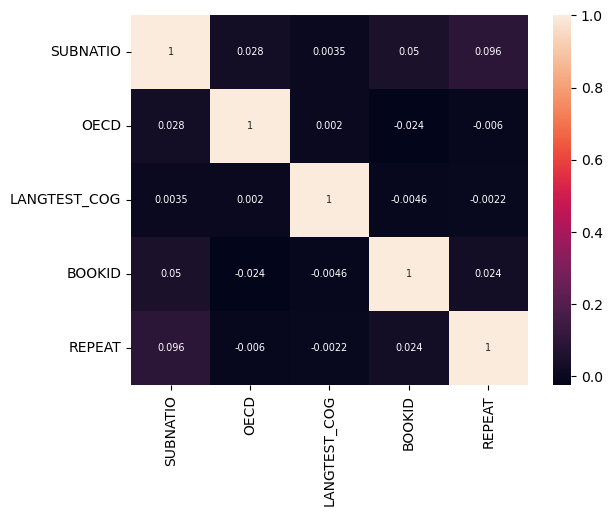

In [543]:
df=data[['SUBNATIO','OECD','LANGTEST_COG','BOOKID','REPEAT']]
print('Part of missing values for every column')
df=df.dropna(axis=0,how='any')
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':7})

<Axes: >

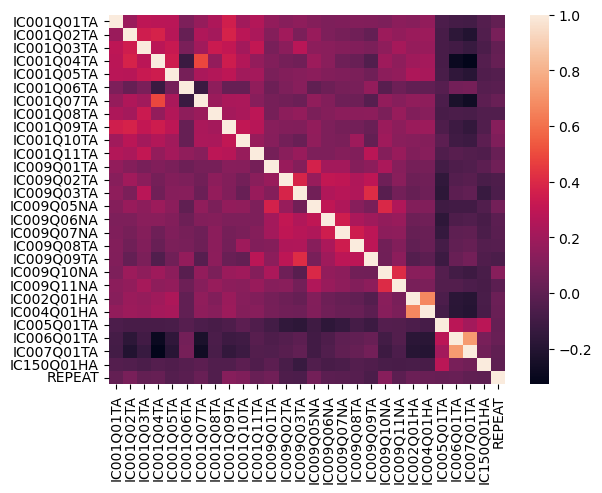

In [270]:
df=data[['IC001Q01TA','IC001Q02TA','IC001Q03TA','IC001Q04TA','IC001Q05TA','IC001Q06TA','IC001Q07TA','IC001Q08TA','IC001Q09TA','IC001Q10TA','IC001Q11TA','IC009Q01TA','IC009Q02TA','IC009Q03TA','IC009Q05NA','IC009Q06NA','IC009Q07NA','IC009Q08TA','IC009Q09TA','IC009Q10NA','IC009Q11NA','IC002Q01HA','IC004Q01HA','IC005Q01TA','IC006Q01TA','IC007Q01TA','IC150Q01HA','REPEAT']]
df=df.dropna(axis=0,how='any')
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

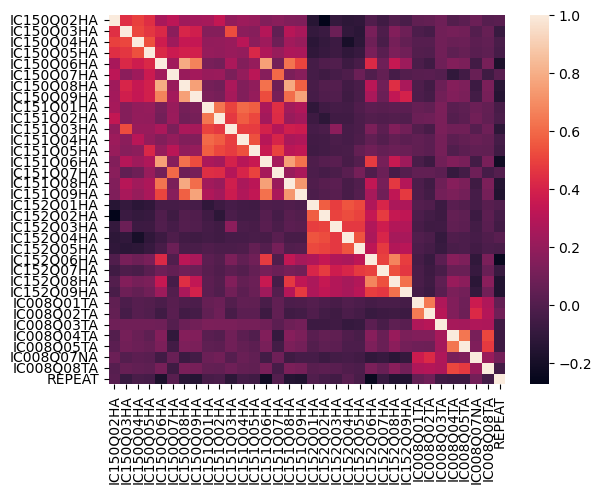

In [272]:
df=data[['IC150Q02HA','IC150Q03HA','IC150Q04HA','IC150Q05HA','IC150Q06HA','IC150Q07HA','IC150Q08HA','IC150Q09HA','IC151Q01HA','IC151Q02HA','IC151Q03HA','IC151Q04HA','IC151Q05HA','IC151Q06HA','IC151Q07HA','IC151Q08HA','IC151Q09HA','IC152Q01HA','IC152Q02HA','IC152Q03HA','IC152Q04HA','IC152Q05HA','IC152Q06HA','IC152Q07HA','IC152Q08HA','IC152Q09HA','IC008Q01TA','IC008Q02TA','IC008Q03TA','IC008Q04TA','IC008Q05TA','IC008Q07NA','IC008Q08TA','REPEAT']]
df=df.dropna(axis=0,how='any')
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

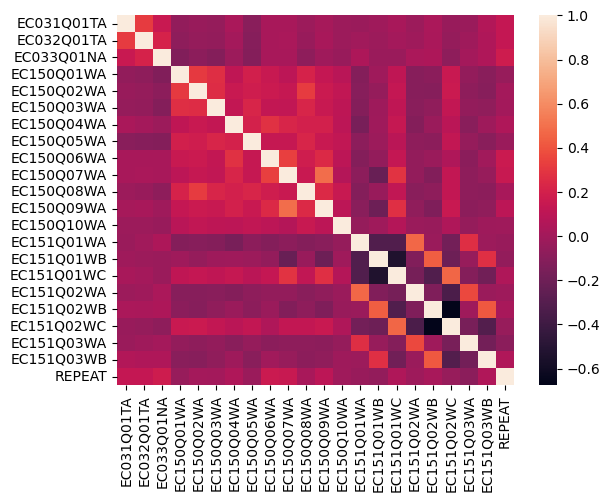

In [553]:
df=data[['EC031Q01TA','EC032Q01TA','EC033Q01NA','EC150Q01WA','EC150Q02WA','EC150Q03WA','EC150Q04WA','EC150Q05WA','EC150Q06WA','EC150Q07WA','EC150Q08WA','EC150Q09WA','EC150Q10WA','EC151Q01WA','EC151Q01WB','EC151Q01WC','EC151Q02WA','EC151Q02WB','EC151Q02WC','EC151Q03WA','EC151Q03WB','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

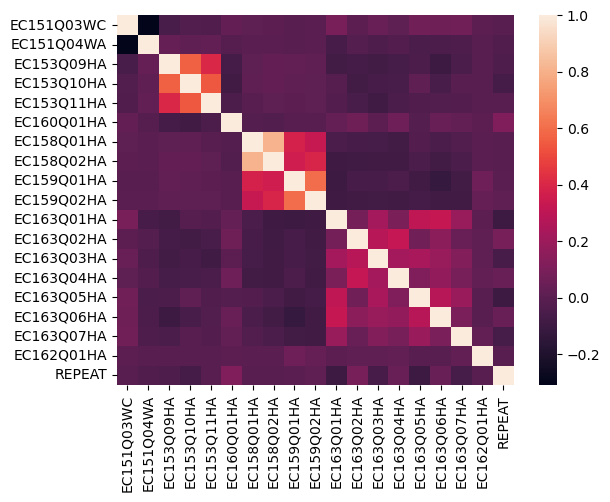

In [554]:
df=data[['EC151Q03WC','EC151Q04WA','EC153Q09HA','EC153Q10HA','EC153Q11HA','EC160Q01HA','EC158Q01HA','EC158Q02HA','EC159Q01HA','EC159Q02HA','EC163Q01HA','EC163Q02HA','EC163Q03HA','EC163Q04HA','EC163Q05HA','EC163Q06HA','EC163Q07HA','EC162Q01HA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

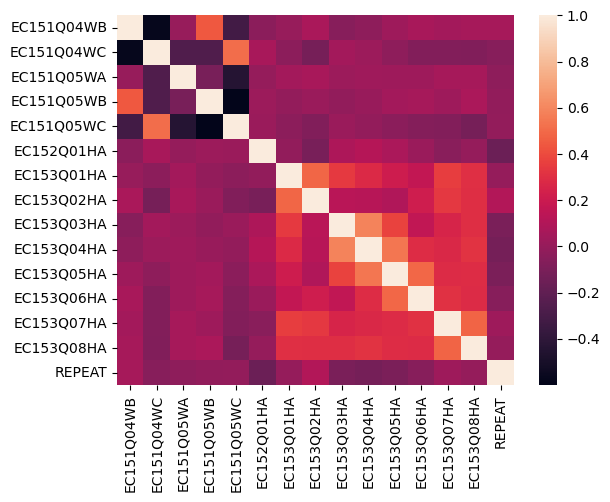

In [555]:
df=data[['EC151Q04WB','EC151Q04WC','EC151Q05WA','EC151Q05WB','EC151Q05WC','EC152Q01HA','EC153Q01HA','EC153Q02HA','EC153Q03HA','EC153Q04HA','EC153Q05HA','EC153Q06HA','EC153Q07HA','EC153Q08HA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

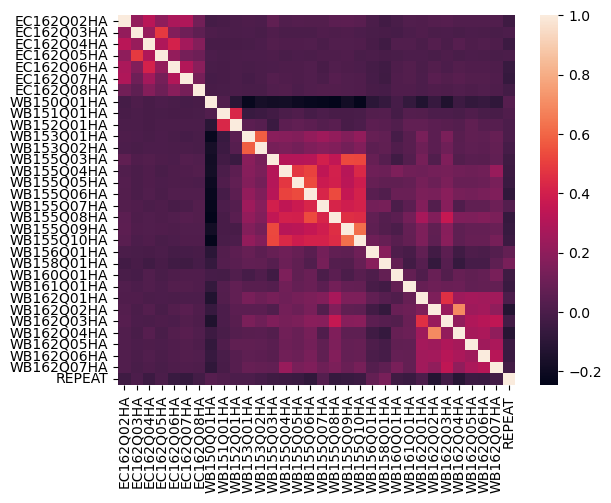

In [276]:
df=data[['EC162Q02HA','EC162Q03HA','EC162Q04HA','EC162Q05HA','EC162Q06HA','EC162Q07HA','EC162Q08HA','WB150Q01HA','WB151Q01HA','WB152Q01HA','WB153Q01HA','WB153Q02HA','WB155Q03HA','WB155Q04HA','WB155Q05HA','WB155Q06HA','WB155Q07HA','WB155Q08HA','WB155Q09HA','WB155Q10HA','WB156Q01HA','WB158Q01HA','WB160Q01HA','WB161Q01HA','WB162Q01HA','WB162Q02HA','WB162Q03HA','WB162Q04HA','WB162Q05HA','WB162Q06HA','WB162Q07HA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

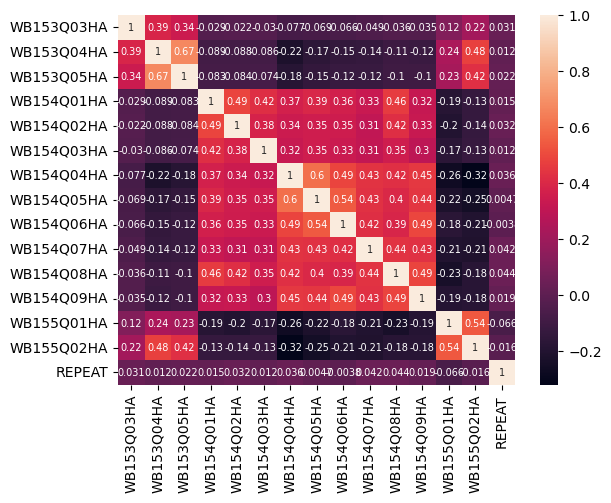

In [550]:
df=data[['WB153Q03HA','WB153Q04HA','WB153Q05HA','WB154Q01HA','WB154Q02HA','WB154Q03HA','WB154Q04HA','WB154Q05HA','WB154Q06HA','WB154Q07HA','WB154Q08HA','WB154Q09HA','WB155Q01HA','WB155Q02HA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':7})

<Axes: >

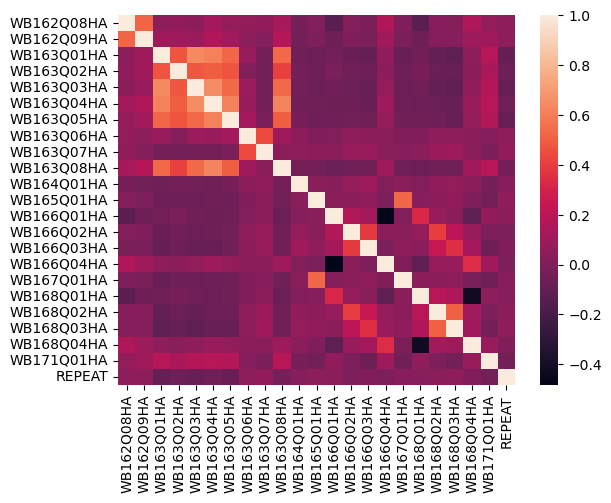

In [278]:
df=data[['WB162Q08HA','WB162Q09HA','WB163Q01HA','WB163Q02HA','WB163Q03HA','WB163Q04HA','WB163Q05HA','WB163Q06HA','WB163Q07HA','WB163Q08HA','WB164Q01HA','WB165Q01HA','WB166Q01HA','WB166Q02HA','WB166Q03HA','WB166Q04HA','WB167Q01HA','WB168Q01HA','WB168Q02HA','WB168Q03HA','WB168Q04HA','WB171Q01HA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

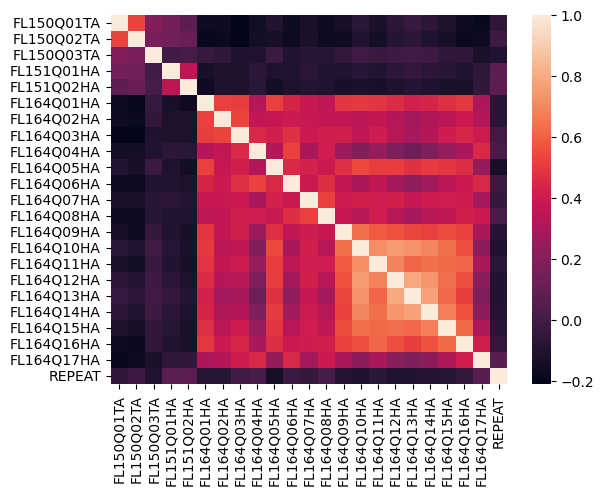

In [556]:
df=data[['FL150Q01TA','FL150Q02TA','FL150Q03TA','FL151Q01HA','FL151Q02HA','FL164Q01HA','FL164Q02HA','FL164Q03HA','FL164Q04HA','FL164Q05HA','FL164Q06HA','FL164Q07HA','FL164Q08HA','FL164Q09HA','FL164Q10HA','FL164Q11HA','FL164Q12HA','FL164Q13HA','FL164Q14HA','FL164Q15HA','FL164Q16HA','FL164Q17HA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

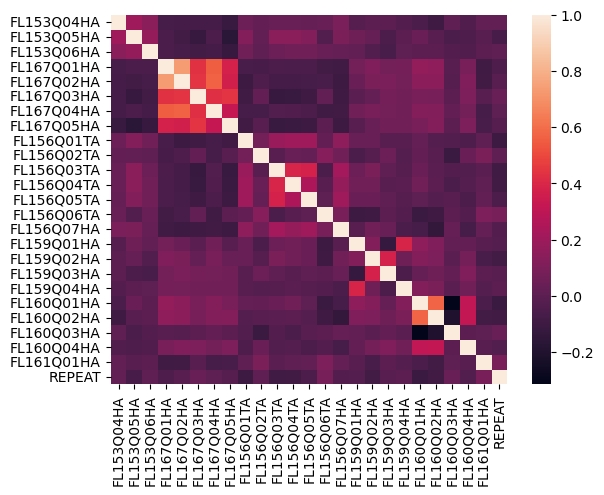

In [280]:
df=data[['FL153Q04HA','FL153Q05HA','FL153Q06HA','FL167Q01HA','FL167Q02HA','FL167Q03HA','FL167Q04HA','FL167Q05HA','FL156Q01TA','FL156Q02TA','FL156Q03TA','FL156Q04TA','FL156Q05TA','FL156Q06TA','FL156Q07HA','FL159Q01HA','FL159Q02HA','FL159Q03HA','FL159Q04HA','FL160Q01HA','FL160Q02HA','FL160Q03HA','FL160Q04HA','FL161Q01HA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

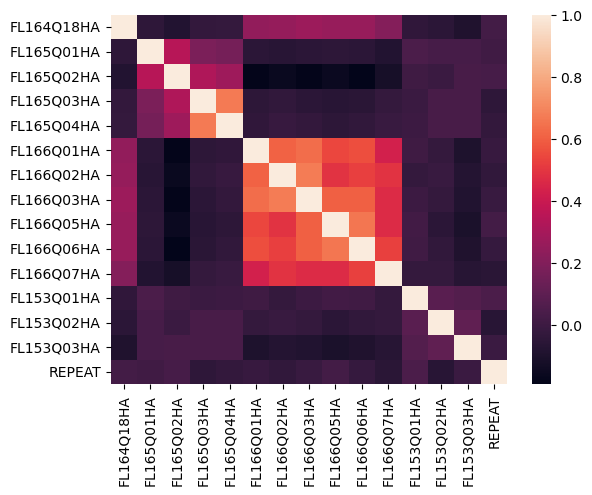

In [281]:
df=data[['FL164Q18HA','FL165Q01HA','FL165Q02HA','FL165Q03HA','FL165Q04HA','FL166Q01HA','FL166Q02HA','FL166Q03HA','FL166Q05HA','FL166Q06HA','FL166Q07HA','FL153Q01HA','FL153Q02HA','FL153Q03HA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

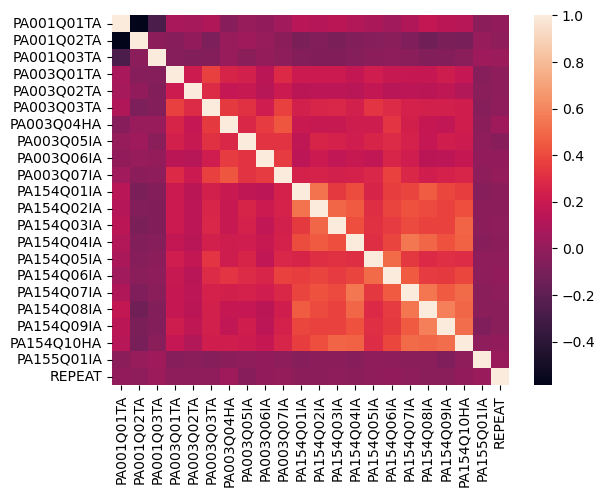

In [282]:
df=data[['PA001Q01TA','PA001Q02TA','PA001Q03TA','PA003Q01TA','PA003Q02TA','PA003Q03TA','PA003Q04HA','PA003Q05IA','PA003Q06IA','PA003Q07IA','PA154Q01IA','PA154Q02IA','PA154Q03IA','PA154Q04IA','PA154Q05IA','PA154Q06IA','PA154Q07IA','PA154Q08IA','PA154Q09IA','PA154Q10HA','PA155Q01IA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

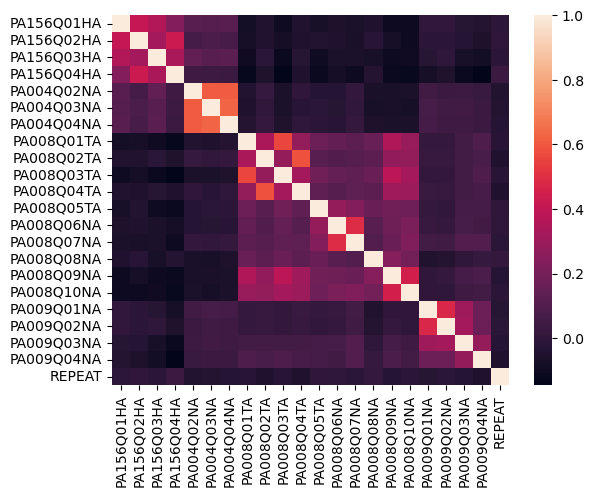

In [283]:
df=data[['PA156Q01HA','PA156Q02HA','PA156Q03HA','PA156Q04HA','PA004Q02NA','PA004Q03NA','PA004Q04NA','PA008Q01TA','PA008Q02TA','PA008Q03TA','PA008Q04TA','PA008Q05TA','PA008Q06NA','PA008Q07NA','PA008Q08NA','PA008Q09NA','PA008Q10NA','PA009Q01NA','PA009Q02NA','PA009Q03NA','PA009Q04NA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

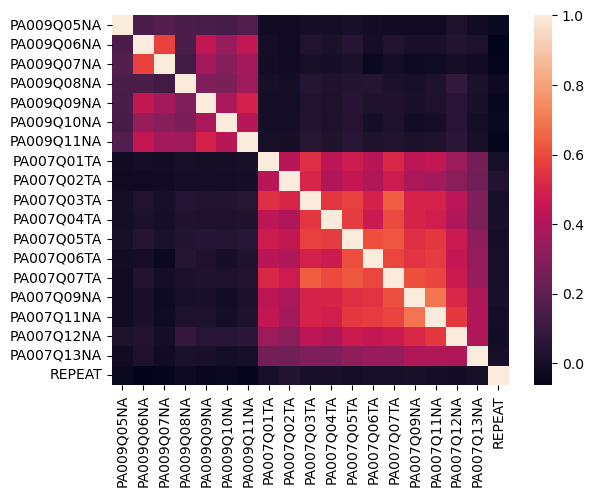

In [240]:
df=data[['PA009Q05NA','PA009Q06NA','PA009Q07NA','PA009Q08NA','PA009Q09NA','PA009Q10NA','PA009Q11NA','PA007Q01TA','PA007Q02TA','PA007Q03TA','PA007Q04TA','PA007Q05TA','PA007Q06TA','PA007Q07TA','PA007Q09NA','PA007Q11NA','PA007Q12NA','PA007Q13NA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

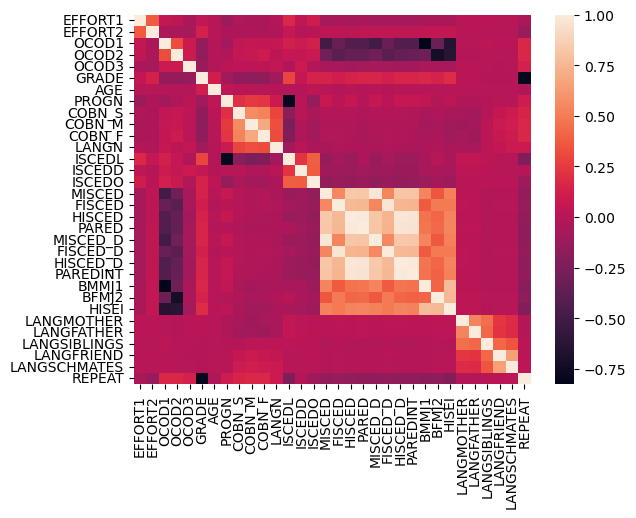

In [259]:
df=data[['EFFORT1','EFFORT2','OCOD1','OCOD2','OCOD3','GRADE','AGE','PROGN','COBN_S','COBN_M','COBN_F','LANGN','ISCEDL','ISCEDD','ISCEDO','MISCED','FISCED','HISCED','PARED','MISCED_D','FISCED_D','HISCED_D','PAREDINT','BMMJ1','BFMJ2','HISEI','LANGMOTHER','LANGFATHER','LANGSIBLINGS','LANGFRIEND','LANGSCHMATES','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

#### 从上图可以明显观察到GRADE是与REPEAT强相关的

<Axes: >

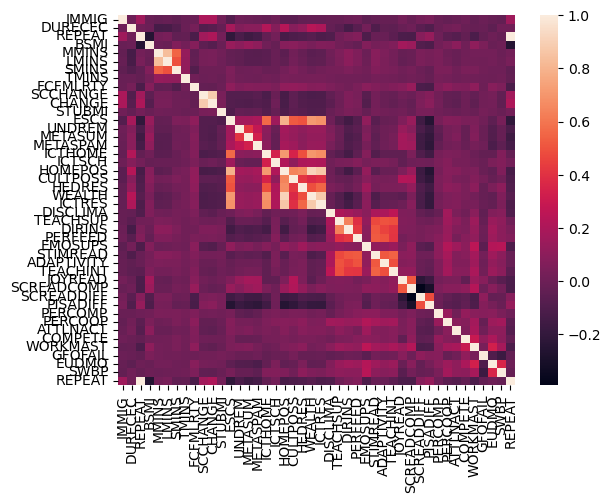

In [261]:
df=data[['IMMIG','DURECEC','REPEAT','BSMJ','MMINS','LMINS','SMINS','TMINS','FCFMLRTY','SCCHANGE','CHANGE','STUBMI','ESCS','UNDREM','METASUM','METASPAM','ICTHOME','ICTSCH','HOMEPOS','CULTPOSS','HEDRES','WEALTH','ICTRES','DISCLIMA','TEACHSUP','DIRINS','PERFEED','EMOSUPS','STIMREAD','ADAPTIVITY','TEACHINT','JOYREAD','SCREADCOMP','SCREADDIFF','PISADIFF','PERCOMP','PERCOOP','ATTLNACT','COMPETE','WORKMAST','GFOFAIL','EUDMO','SWBP','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

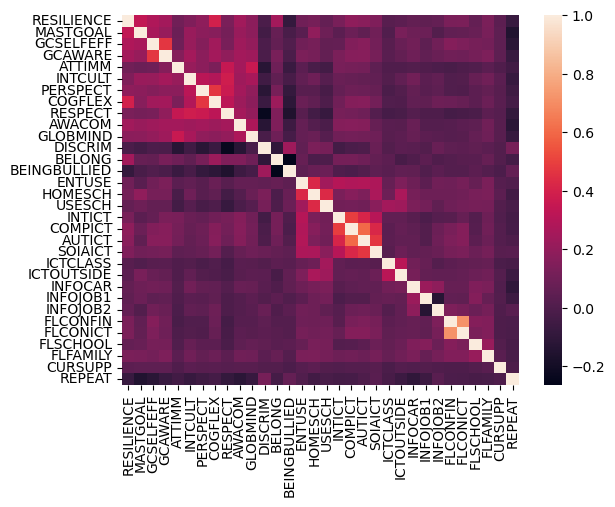

In [262]:
df=data[['RESILIENCE','MASTGOAL','GCSELFEFF','GCAWARE','ATTIMM','INTCULT','PERSPECT','COGFLEX','RESPECT','AWACOM','GLOBMIND','DISCRIM','BELONG','BEINGBULLIED','ENTUSE','HOMESCH','USESCH','INTICT','COMPICT','AUTICT','SOIAICT','ICTCLASS','ICTOUTSIDE','INFOCAR','INFOJOB1','INFOJOB2','FLCONFIN','FLCONICT','FLSCHOOL','FLFAMILY','CURSUPP','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<Axes: >

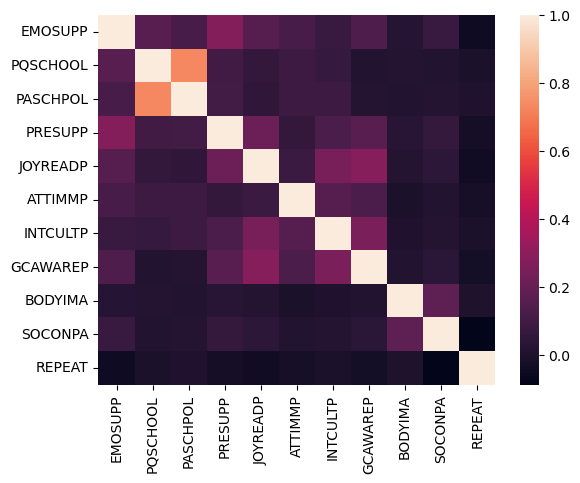

In [263]:
df=data[['EMOSUPP','PQSCHOOL','PASCHPOL','PRESUPP','JOYREADP','ATTIMMP','INTCULTP','GCAWAREP','BODYIMA','SOCONPA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<AxesSubplot:>

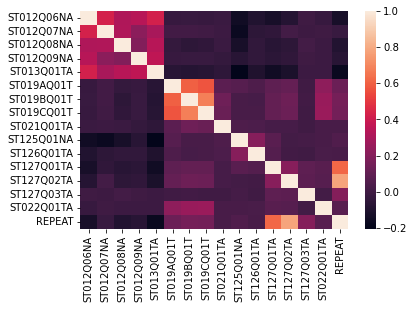

In [20]:
df=data[['ST012Q06NA','ST012Q07NA','ST012Q08NA','ST012Q09NA','ST013Q01TA','ST019AQ01T','ST019BQ01T','ST019CQ01T','ST021Q01TA','ST125Q01NA','ST126Q01TA','ST127Q01TA','ST127Q02TA','ST127Q03TA','ST022Q01TA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

#### 从上图可以明显观察到ST127Q01TA,ST127Q02TA,ST127Q03TA是与REPEAT强相关的

<Axes: >

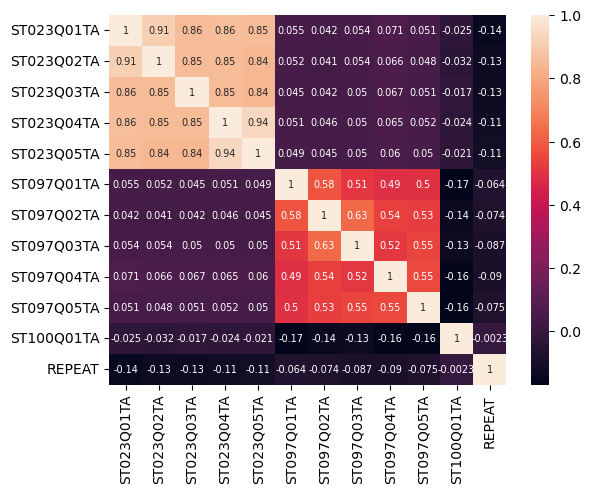

In [542]:
df=data[['ST023Q01TA','ST023Q02TA','ST023Q03TA','ST023Q04TA','ST023Q05TA','ST097Q01TA','ST097Q02TA','ST097Q03TA','ST097Q04TA','ST097Q05TA','ST100Q01TA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':7})

<Axes: >

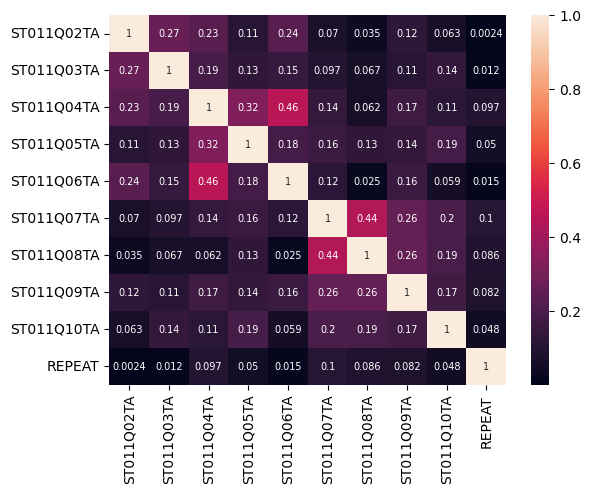

In [540]:
df=data[['ST011Q02TA','ST011Q03TA','ST011Q04TA','ST011Q05TA','ST011Q06TA','ST011Q07TA','ST011Q08TA','ST011Q09TA','ST011Q10TA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':7})

<Axes: >

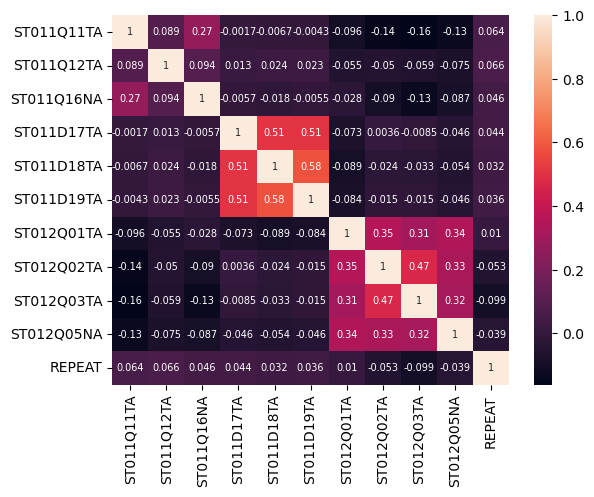

In [535]:
df=data[['ST011Q11TA','ST011Q12TA','ST011Q16NA','ST011D17TA','ST011D18TA','ST011D19TA','ST012Q01TA','ST012Q02TA','ST012Q03TA','ST012Q05NA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':7})

<AxesSubplot:>

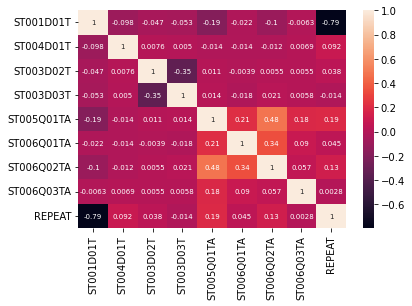

In [18]:
df=data[['ST001D01T','ST004D01T','ST003D02T','ST003D03T','ST005Q01TA','ST006Q01TA','ST006Q02TA','ST006Q03TA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':7})

#### 明显观察到ST001D01T和REPEAT是强相关的

<AxesSubplot:>

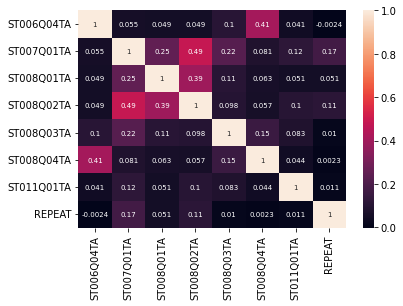

In [19]:
df=data[['ST006Q04TA','ST007Q01TA','ST008Q01TA','ST008Q02TA','ST008Q03TA','ST008Q04TA','ST011Q01TA','REPEAT']]
df=df.fillna(df.mean())
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':7})

## 观察以上hotmap中各种属性与REPEAT之间的相关性，考察属性的含义，综合考虑选取以下特征

- 'ST127Q01TA','ST127Q02TA','ST127Q03TA'，'ST001D01T'
- 'EC031Q01TA','EC032Q01TA','EC033Q01NA','EC150Q05WA','EC150Q06WA','EC150Q07WA','EC150Q08WA'
- 'OCOD1','OCOD2','OCOD3'
- 'PROGN','COBN_S','COBN_M','COBN_F'

## 根据以上相关系数计算选取的列属性名与其描述

|Field    |description                      |   
|:----------|:----------                     |   
|ST127Q01TA |Have you ever repeated a <grade>? At <ISCED 1>|
|ST127Q02TA |Have you ever repeated a <grade>? At <ISCED 2>|
|ST127Q03TA	|Have you ever repeated a <grade>? At <ISCED 3>|
|ST001D01T  |Student International Grade (Derived)|
|EC031Q01TA |Did you change schools when you were attending <ISCED 1>?|
|EC032Q01TA |Did you change schools when you were attending <ISCED 2>?|
|EC033Q01NA |Have you ever changed your study programme?|
|EC150Q05WA |Find out about future study or types of work: I spoke to a <career advisor> outside of my school.|
|EC150Q06WA |Find out about future study or types of work: I completed a questionnaire to find out about my interests and abilities.|
|EC150Q07WA |Find out about future study or types of work: I researched the Internet for information about careers.|
|EC150Q08WA |Find out about future study or types of work: I went to an organised tour in an <ISCED 3-5> institution.|
|OCOD1|ISCO-08 Occupation code - Mother
|OCOD2|ISCO-08 Occupation code - Father|
|OCOD3|ISCO-08 Occupation code - Self|
|GRADE|Grade compared to modal grade in country|
|PROGN|Unique national study programme code|
|COBN_S|Country of Birth National Categories- Self|
|COBN_M|Country of Birth National Categories- Mother|
|COBN_F|Country of Birth National Categories- Father|

## ST127Q01TA  ST127Q02TA  ST127Q03TA ST001D01T分析

Part of missing values for every column
ST127Q01TA    0.050289
ST127Q02TA    0.038719
ST127Q03TA    0.658929
REPEAT        0.001755
dtype: float64


<AxesSubplot:>

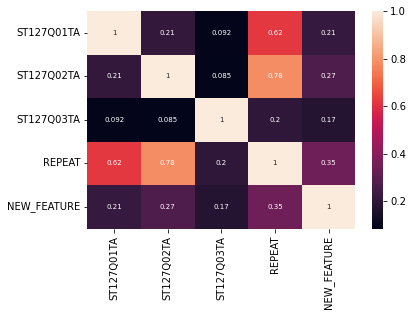

In [23]:
#构造的新属性列的函数
def fun(a,b,c):
    if(a>1 or b>1 or c>1) :
        return 1
    else :
        return 0
df=data[['ST127Q01TA','ST127Q02TA','ST127Q03TA','REPEAT']]
print('Part of missing values for every column')
print(df.isnull().sum() / len(df))
df=df.fillna(df.mean())
#选择平均值填充存在空值的行
df['NEW_FEATURE']=df.apply(lambda col:fun(col['ST127Q01TA'],col['ST127Q02TA'],col['ST127Q03TA']),axis=1)
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':7})

## EC031Q01TA,EC032Q01TA,EC033Q01NA,EC150Q05WA,EC150Q06WA,
## EC150Q07WA,EC150Q08WA分析

Part of missing values for every column
EC031Q01TA    0.283171
EC032Q01TA    0.285755
EC033Q01NA    0.285731
EC150Q05WA    0.297491
EC150Q06WA    0.298345
EC150Q07WA    0.297586
EC150Q08WA    0.299625
REPEAT        0.001755
dtype: float64


<AxesSubplot:>

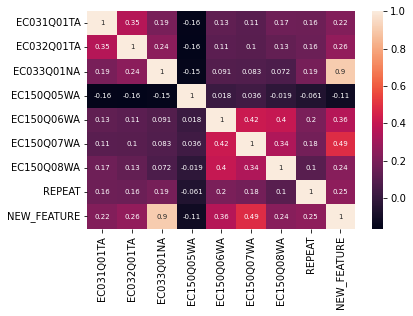

In [48]:
#构造的新属性列的函数
def fun(a,b,c):
    dict_={(1,1,1):1,(1,1,2):2,(1,1,3):3,(1,2,1):4,(1,2,2):5,(1,2,3):6,(1,3,1):7,(1,3,2):8,(1,3,3):9,
          (2,1,1):10,(2,1,2):11,(2,1,3):12,(2,2,1):13,(2,2,2):14,(2,2,3):15,(2,3,1):16,(2,3,2):17,(2,3,3):18,
          (3,1,1):19,(3,1,2):20,(3,1,3):21,(3,2,1):22,(3,2,2):23,(3,2,3):24,(3,3,1):25,(3,3,2):26,(3,3,3):27,}
    return dict_[(a,b,c)]
#该函数可以将三个特征的笛卡尔积映射到1-27数字之中
df=data[['EC031Q01TA','EC032Q01TA','EC033Q01NA','EC150Q05WA','EC150Q06WA','EC150Q07WA','EC150Q08WA','REPEAT']]
print('Part of missing values for every column')
print(df.isnull().sum() / len(df))
df=df.fillna(method='ffill')
df=df.fillna(method='bfill')
#这里采取前后值参考填写缺失值
df['NEW_FEATURE']=df.apply(lambda col:fun(col['EC033Q01NA'],col['EC150Q07WA'],col['EC150Q06WA']),axis=1)
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':7})

In [49]:
ds=df['NEW_FEATURE'].value_counts().reset_index()

In [50]:
ds.columns=[
    'NEW_FEATURE',
    'COUNT'
]

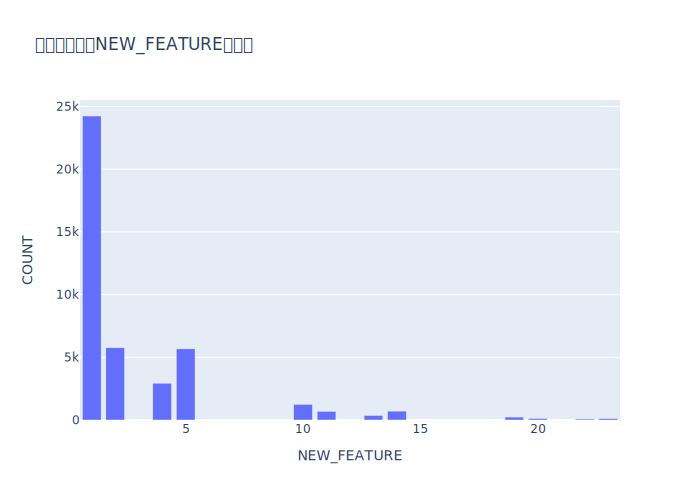

In [51]:
fig = px.bar(ds,x='NEW_FEATURE',y='COUNT',title='新生成的特征NEW_FEATURE的分布')
fig.show("svg") 

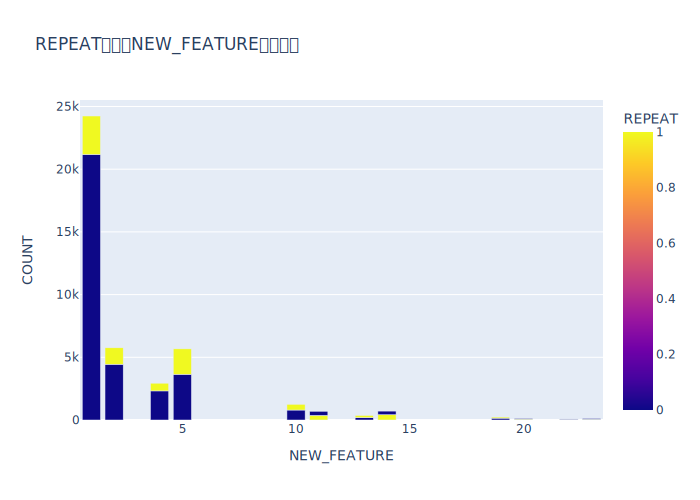

In [47]:
df=df[['NEW_FEATURE','REPEAT']]
ds=df.value_counts(subset=['NEW_FEATURE','REPEAT']).reset_index()
ds.columns=["NEW_FEATURE","REPEAT","COUNT"]
fig=px.bar(
    ds,
    x="NEW_FEATURE",
    y="COUNT",
    color="REPEAT",
    title="REPEAT在不同NEW_FEATURE下的分布"
)
fig.show("svg")

## OCOD1,OCOD2,OCOD3的分析

In [18]:
df=data[['OCOD1','OCOD2','OCOD3','REPEAT']]
print('Part of missing values for every column')
print(df.isnull().sum() / len(df))

Part of missing values for every column
OCOD1     0.000000
OCOD2     0.000000
OCOD3     0.000000
REPEAT    0.001755
dtype: float64


<Axes: >

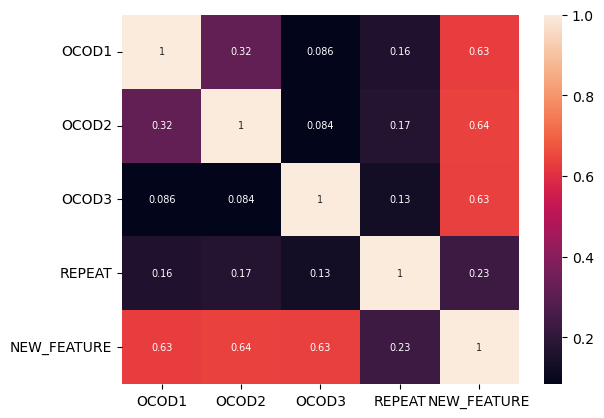

In [19]:
df=df.fillna(df.mean())
#采取平局值填充缺失值法
df['NEW_FEATURE']=df.apply(lambda col:(col['OCOD1']*col['OCOD2']*col['OCOD3'])**(1/3),axis=1)
#取几何平均作为新特征的函数
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':7})

## ST001D01T的分析

In [27]:
df=data[['ST001D01T','REPEAT']]
print('Part of missing values for every column')
print(df.isnull().sum() / len(df))

Part of missing values for every column
ST001D01T    0.000000
REPEAT       0.001755
dtype: float64


In [28]:
df=df.fillna(df.mean())
#采取平局值填充缺失值法

<AxesSubplot:>

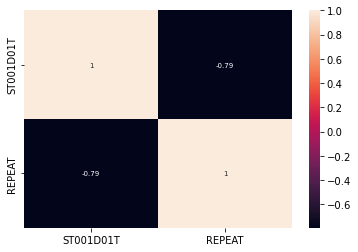

In [29]:
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':7})

## COBN_S COBN_M COBN_F的分析

In [20]:
df=data[['COBN_S','COBN_M','COBN_F','REPEAT']]
print('Part of missing values for every column')
print(df.isnull().sum() / len(df))

Part of missing values for every column
COBN_S    0.000000
COBN_M    0.000000
COBN_F    0.000000
REPEAT    0.001755
dtype: float64


In [21]:
df=df.dropna(axis=0,how='any')

In [22]:
df['NEW_FEATURE']=df.apply(lambda col:col['COBN_M']+col['COBN_F']+col['COBN_S'],axis=1)

<Axes: >

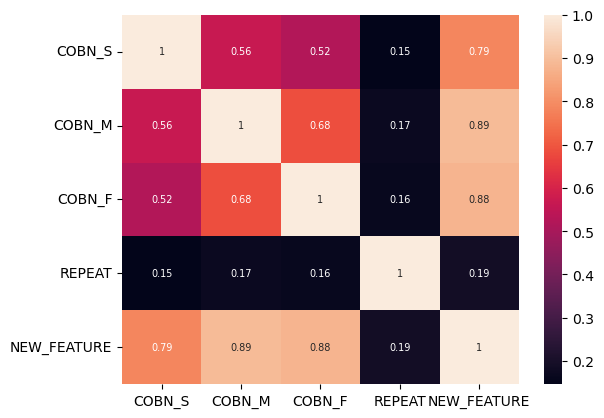

In [23]:
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':7})

## GRADE的分析

       GRADE  REPEAT  NEW_FEATURE
0        0.0     0.0        False
1        0.0     0.0        False
2        0.0     0.0        False
3        0.0     0.0        False
4        0.0     0.0        False
...      ...     ...          ...
42171    0.0     0.0        False
42172   -1.0     1.0         True
42173    0.0     0.0        False
42174   -2.0     1.0         True
42175   -1.0     1.0         True

[42102 rows x 3 columns]


<AxesSubplot:>

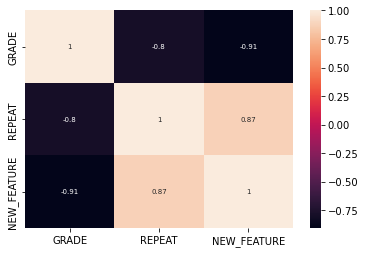

In [52]:
df=data[['GRADE','REPEAT']]
df=df.dropna(axis=0,how='any')
#删除含有空值的行
df['NEW_FEATURE']=df.apply(lambda col:col['GRADE']<0,axis=1)
#将'GRADE'属性不为0的全部映射到1
corr=df.corr()
print(df)
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':7})

In [53]:
df=df[['NEW_FEATURE','REPEAT']]
ds=df.value_counts(subset=['NEW_FEATURE','REPEAT']).reset_index()

In [54]:
ds.columns=['NEW_FEATURE','REPEAT','COUNT']
list_=list(ds['COUNT'])
print(ds)

   NEW_FEATURE  REPEAT  COUNT
0        False     0.0  32101
1         True     1.0   8101
2         True     0.0   1302
3        False     1.0    598


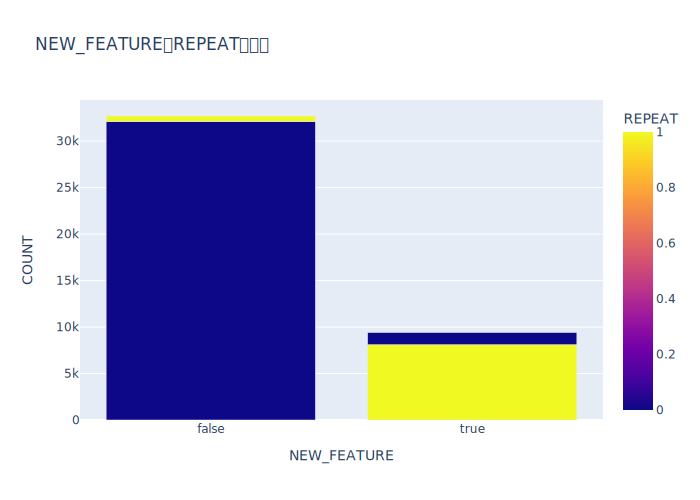

In [55]:
fig=px.bar(
    ds,
    x="NEW_FEATURE",
    y="COUNT",
    color="REPEAT",
    title="NEW_FEATURE对REPEAT的分布"
)
fig.show("svg")

In [60]:
dx=df[df['REPEAT']==1]
dy=df[df['REPEAT']==0]
ds=dx['NEW_FEATURE'].value_counts().reset_index()
dm=dy['NEW_FEATURE'].value_counts().reset_index()

In [61]:
ds.columns=[
    'NEW_FEATURE',
    'PERCENT'
]
ds['PERCENT']/=len(dx)
dm.columns=[
    'NEW_FEATURE',
    'PERCENT'
]
dm['PERCENT']/=len(dy)

In [62]:
fig1=px.pie(ds,names='NEW_FEATURE',values='PERCENT',title="repeat特征值为1的数据的NEW_FEATURE分布")
fig2=px.pie(dm,names='NEW_FEATURE',values='PERCENT',title="repeat特征值为0的数据的NEW_FEATURE分布")

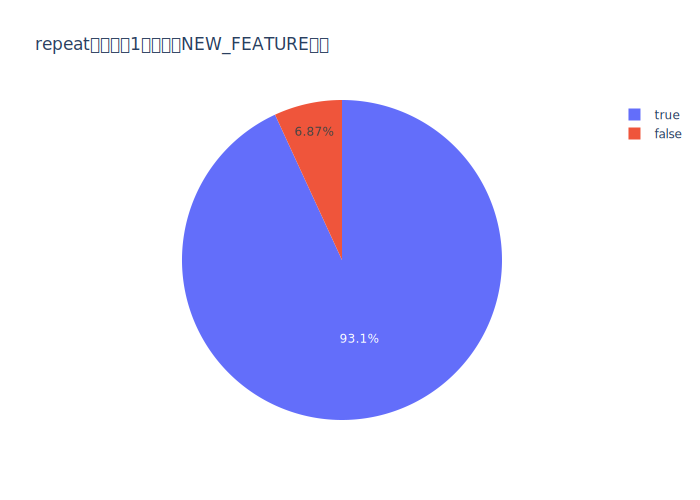

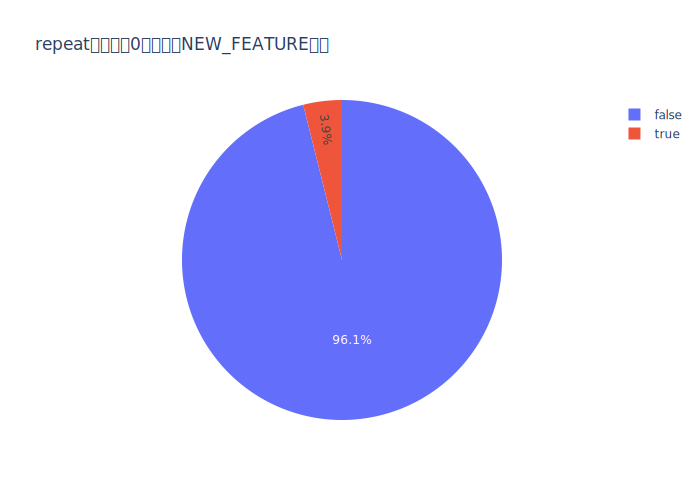

In [63]:
fig1.show("svg")
fig2.show("svg")

## 根据属性的描述选取特征

- 由列属性的描述，可以初步判断一些属性与目标列的相关性

### CNTRYID对REPEAT的相关性分析

<AxesSubplot:>

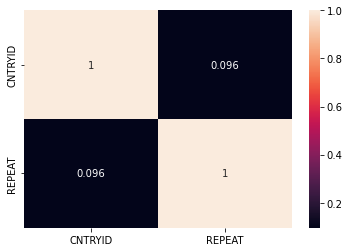

In [70]:
dx=data[['CNTRYID','REPEAT']]
df=dx.dropna(axis=0,how='any')
#删除含有空值的行
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':10})

In [71]:
df1=data[data['CNTRYID']==152.0]
df2=data[data['CNTRYID']==724.0]
df3=data[data['CNTRYID']==484.0]
df4=data[data['CNTRYID']==591.0]
df5=data[data['CNTRYID']==214.0]
ds1 = df1['REPEAT'].value_counts().reset_index()
ds2 = df2['REPEAT'].value_counts().reset_index()
ds3 = df3['REPEAT'].value_counts().reset_index()
ds4 = df4['REPEAT'].value_counts().reset_index()
ds5 = df5['REPEAT'].value_counts().reset_index()
ds1.columns=[
    'REPEAT',
    'PERCENT'
]
ds2.columns=[
    'REPEAT',
    'PERCENT'
]
ds3.columns=[
    'REPEAT',
    'PERCENT'
]
ds4.columns=[
    'REPEAT',
    'PERCENT'
]
ds5.columns=[
    'REPEAT',
    'PERCENT'
]
ds1['PERCENT']/=len(df1)
ds2['PERCENT']/=len(df2)
ds3['PERCENT']/=len(df3)
ds4['PERCENT']/=len(df4)
ds5['PERCENT']/=len(df5)

In [72]:
fig1 = px.pie(ds1,names = 'REPEAT',values = 'PERCENT',title = "CNTRYID为152的repeat占比")
fig2 = px.pie(ds2,names = 'REPEAT',values = 'PERCENT',title = "CNTRYID为724的repeat占比")
fig3 = px.pie(ds3,names = 'REPEAT',values = 'PERCENT',title = "CNTRYID为484的repeat占比")
fig4 = px.pie(ds4,names = 'REPEAT',values = 'PERCENT',title = "CNTRYID为591的repeat占比")
fig5 = px.pie(ds5,names = 'REPEAT',values = 'PERCENT',title = "CNTRYID为214的repeat占比")

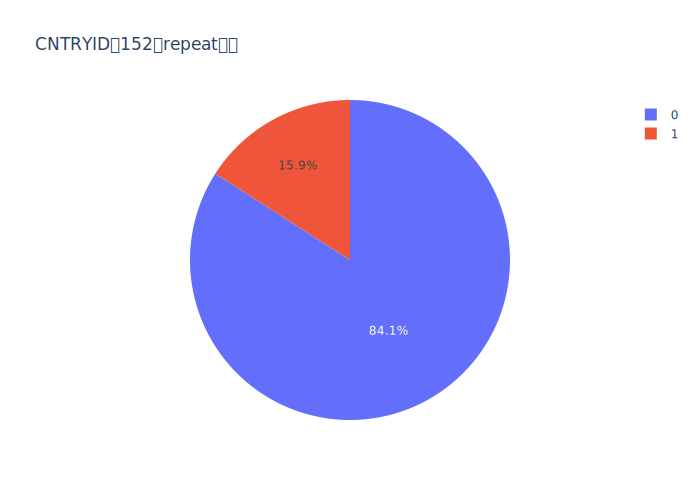

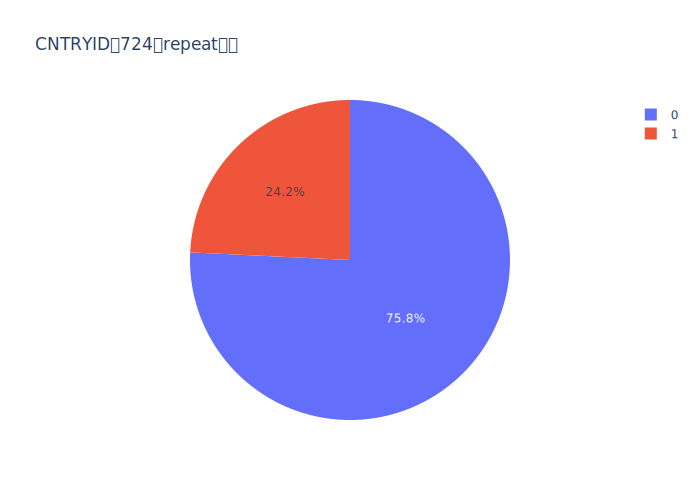

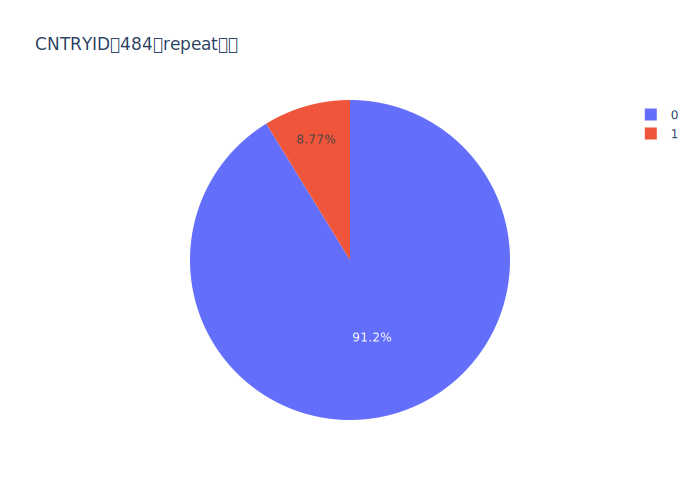

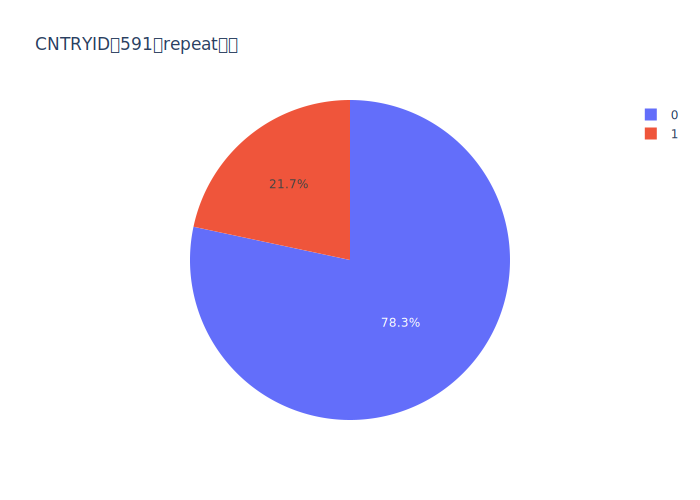

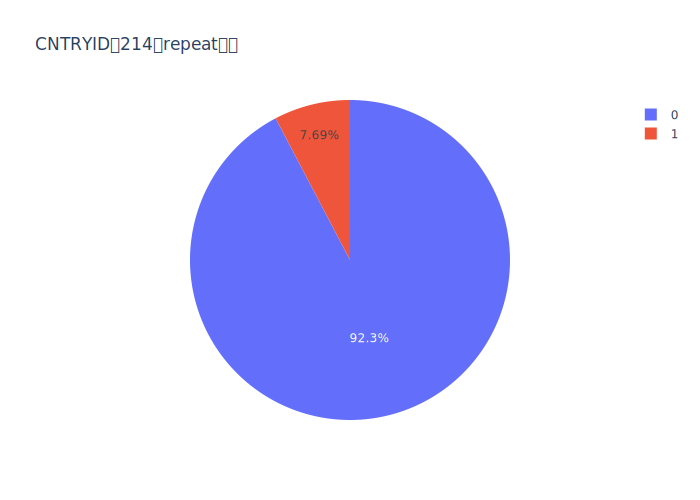

In [75]:
fig1.show("svg")
fig2.show("svg")
fig3.show("svg")
fig4.show("svg")
fig5.show("svg")

### ST005Q01TA 与ST007Q01TA对REPEAT的相关性分析

- 由于父母亲的教育程度会一定程度上影响到孩子教育，所以做出假设，这两个特征与REPEAT具有一定相关性

In [68]:
df=data[['ST005Q01TA','ST007Q01TA','REPEAT']]

In [69]:
df=df.fillna(method='ffill')
df=df.fillna(method='bfill')
#这里采取前后值参考填写缺失值
df['NEW_FEATURE']=df.apply(lambda col:math.sqrt((col['ST005Q01TA']**2+col['ST007Q01TA']**2)/2),axis=1)
#平方平均构造新的特征

<Axes: >

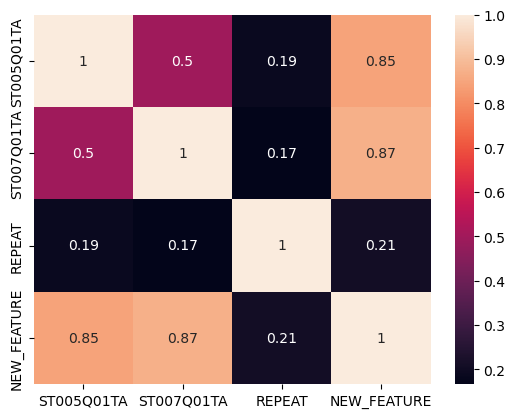

In [66]:
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':10})